In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read the Chicago Crime data into df DataFrame 
df = pd.read_csv("Chicago_Crime_Detective.csv", index_col = 0)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


In [3]:
#to have a better understanding of the data:
df.dtypes

ID                      int64
Date                   object
LocationDescription    object
Arrest                   bool
Domestic                 bool
Beat                    int64
District               object
CommunityArea          object
Year                    int64
dtype: object

Since we are dealing with our date and time feature in Pandas, our main focus would be "Date" column to begin with. You can see that the datatype of the column is object. Doesn't seem fine. So let us fix it.

In [4]:
df['Date'] = pd.to_datetime(df.Date)
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012


You can see that the Date column has changed its orientation and you don't have to worry about it cause pandas already took care of the orientation. Moving on.. to be sure of the datatype of the column

In [9]:
df.dtypes

ID                              int64
Date                   datetime64[ns]
LocationDescription            object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                       object
CommunityArea                  object
Year                            int64
dtype: object

Now that our Date column been sorted, we can start off with our EDA on our data. This notebook, we stick to Date column.

To get a better vision at this date time aspect, we will be answering some questions in this notebook for a better understanding

# What is the Month and Year of the median date in our dataset? 

In [10]:
#how many observations are there to start with
df.shape

(191641, 9)

In [12]:
#to find the median of a column, if n is odd, median=(n+1)/2 
#Lets see the manual way of finding a median.
# The use of .median() is not possible since the Date column has dtype!=int or float.
a=list(df.Date.sort_values())
t = (191641+1)/2  
t
a[95821]

Timestamp('2006-05-21 13:00:00')

Rather easy way of doing the above manual work would be to use .quantile() method in pandas.
Bonus: Head over to https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html for a thorough understanding.

In [13]:
#you can use the df.Date notation to refer to a pandas series or df['Date'] notation.
df.Date.quantile(0.5)

Timestamp('2006-05-21 12:30:00')

# In which month did the lowest motor vehicle thefts occur? 

Since this is a bit tricky question as we dont have a month column in our DataFrame to begin with but not to worry cause pandas got you covered. We will now focus on pandas.Series.dt( applies to only datetime dtype)

In [14]:
#you can directly view the results like this.
df.Date.dt.month.value_counts(sort = False)

1     16047
2     13511
3     15758
4     15280
5     16035
6     16002
7     16801
8     16572
9     16060
10    17086
11    16063
12    16426
Name: Date, dtype: int64

In [16]:
#you can form a month column and view the column value and count it separately.
df['Month'] = df.Date.dt.month
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12


In [21]:
df.Month.value_counts(ascending = True)

2     13511
4     15280
3     15758
6     16002
5     16035
1     16047
9     16060
11    16063
12    16426
8     16572
7     16801
10    17086
Name: Month, dtype: int64

Sorting it in ascending order will give you the Month in which the theft occured the least.

# On which weekday did most motor vehicle thefts occur? 

Similar to the above month problem, this time we have weekday to find. We again will focus on the pandas.Series.dt for the above mentioned problem statement.

In [23]:
df.Date.dt.weekday_name.value_counts()

Friday       29284
Wednesday    27416
Monday       27397
Thursday     27319
Saturday     27118
Tuesday      26791
Sunday       26316
Name: Date, dtype: int64

According to our output, Friday seems to have the most records of theft.

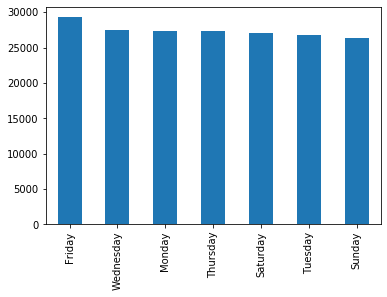

In [24]:
#lets plot a graph to see if we can visualize the data over weekday.
df.Date.dt.weekday_name.value_counts().plot(kind = 'bar')

# Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made? 

to figure out this problem, we will first find out rows where Arrest == true. Then check for the month where the counts are the most.

In [25]:
#filtering the dataframe using rows where Arrest == True
df_temp = df[(df.Arrest == True)]
df_temp.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month
5,8950793,2012-12-31 20:30:00,STREET,True,False,2521,25,19,2012,12
8,8951802,2012-12-31 19:00:00,STREET,True,False,1021,10,29,2012,12
13,8950570,2012-12-31 16:20:00,GAS STATION,True,False,825,8,66,2012,12
47,8949895,2012-12-30 19:46:00,ALLEY,True,False,2512,25,18,2012,12
59,8949557,2012-12-30 15:00:00,STREET,True,False,2535,25,23,2012,12


In [26]:
#counting the value of the Month column with respect to the dataframe.
df_temp.Month.value_counts()

1     1435
12    1397
10    1342
8     1329
7     1324
3     1298
11    1256
4     1252
9     1248
2     1238
6     1230
5     1187
Name: Month, dtype: int64

Seems like January is the month where the most number of arrests were made.

# What seems to be the general flow of motor vehicle thefts over the years?

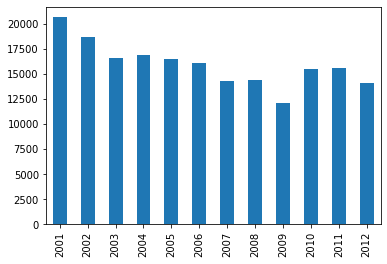

In [27]:
#to answer this question, we need to visualize the entire observation over the YEAR column.
df.Year = df.Year.sort_values()
df.Year.value_counts(sort = False).plot(kind='bar')

# Crimes for which more arrests were made are in the first half of the time period or the second half of the time period? 

In [30]:
df.Year.quantile(0.5)

2006.0

If we see from the graph, crime rate decreased after 2006. So the first half of the time period would have registered more thefts.

This visualization made it amazingly easy to generalize the view on the crime rates over the years.In general, it looks like there has been a decrease in the crime rate from 2002-2012, also crime was the least in 2009. Many more observations could be made using this visualization.

# Few more observations to look at from the given data using the datetime concept of pandas. 

In [29]:
#to do some more EDA over the given data

#lets see at which hour did most of the theft took place
df.Date.dt.hour.value_counts()

22    14745
0     13212
21    12434
20    11716
23    11293
18    10521
19    10427
17     8635
12     8158
9      8136
8      7866
16     7736
15     7512
7      6852
1      6643
10     6566
14     6419
13     5555
11     5415
2      5377
6      5136
3      4202
5      3728
4      3357
Name: Date, dtype: int64

Looks like around 22:00:00, thieves are most comfortable to steal. Need to keep a tight watch!

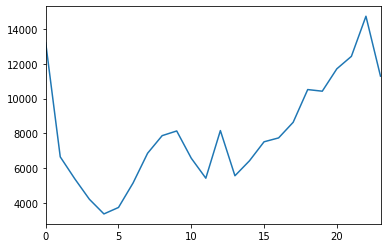

In [31]:
#to plot the visualization for better reach
df.Date.dt.hour.value_counts().sort_index().plot()

In [32]:
#to find the latest timestamp
df.Date.max()

Timestamp('2012-12-31 23:15:00')

In [33]:
#the first recorded timestamp of a theft
df.Date.min()

Timestamp('2001-01-01 00:01:00')

In [35]:
#this dataset is a 4382 recorded days of theft over 12 years

(df.Date.max()-df.Date.min()).days

4382

In [41]:
type((df.Date.max()-df.Date.min()))

pandas._libs.tslibs.timedeltas.Timedelta

The datatype of the above mentioned data is not int surprisingly but Timedelta.

# For what proportion of motor vehicle thefts in 2001 was an arrest made?

In [42]:
df_temp = df[(df.Arrest == True)]
df_temp.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month
5,8950793,2012-12-31 20:30:00,STREET,True,False,2521,25,19,2012,12
8,8951802,2012-12-31 19:00:00,STREET,True,False,1021,10,29,2012,12
13,8950570,2012-12-31 16:20:00,GAS STATION,True,False,825,8,66,2012,12
47,8949895,2012-12-30 19:46:00,ALLEY,True,False,2512,25,18,2012,12
59,8949557,2012-12-30 15:00:00,STREET,True,False,2535,25,23,2012,12


In [45]:
df_temp.Year.value_counts().sort_index()

2001    2152
2002    2115
2003    1798
2004    1693
2005    1528
2006    1302
2007    1212
2008    1020
2009     840
2010     701
2011     625
2012     550
Name: Year, dtype: int64

In [46]:
df.Year.value_counts().sort_index()

2001    20669
2002    18753
2003    16657
2004    16862
2005    16484
2006    16098
2007    14280
2008    14445
2009    12167
2010    15497
2011    15637
2012    14092
Name: Year, dtype: int64

In [57]:
obs_1 = (2152/20669)
round(obs_1,3)

0.104

So, 0.10 of the thefts in 2001 was for which, an arrest was made.

# For what proportion of motor vehicle thefts in 2007 was an arrest made? (round your answer to 2 decimal places)

we follow the same technique as we did for 2001, just tweak a little and stick your eyes to 2007 instead.

In [58]:
df_temp.Year.value_counts().sort_index()

2001    2152
2002    2115
2003    1798
2004    1693
2005    1528
2006    1302
2007    1212
2008    1020
2009     840
2010     701
2011     625
2012     550
Name: Year, dtype: int64

In [59]:
df.Year.value_counts().sort_index()

2001    20669
2002    18753
2003    16657
2004    16862
2005    16484
2006    16098
2007    14280
2008    14445
2009    12167
2010    15497
2011    15637
2012    14092
Name: Year, dtype: int64

In [60]:
obs_2 = 1212/14280
round(obs_2, 2)

0.08

So, 0.08 of the thefts in 2007 was for which, an arrest was made.

# There are many more observation that can be made using the above techniques. Please dont hold back and go that do those EDA. But these basic techniques would be enough for you to EDA through datetime.